         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  
Розмір датасету: (59, 5)
Типи даних:
Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object
Кількість пропусків:
Da

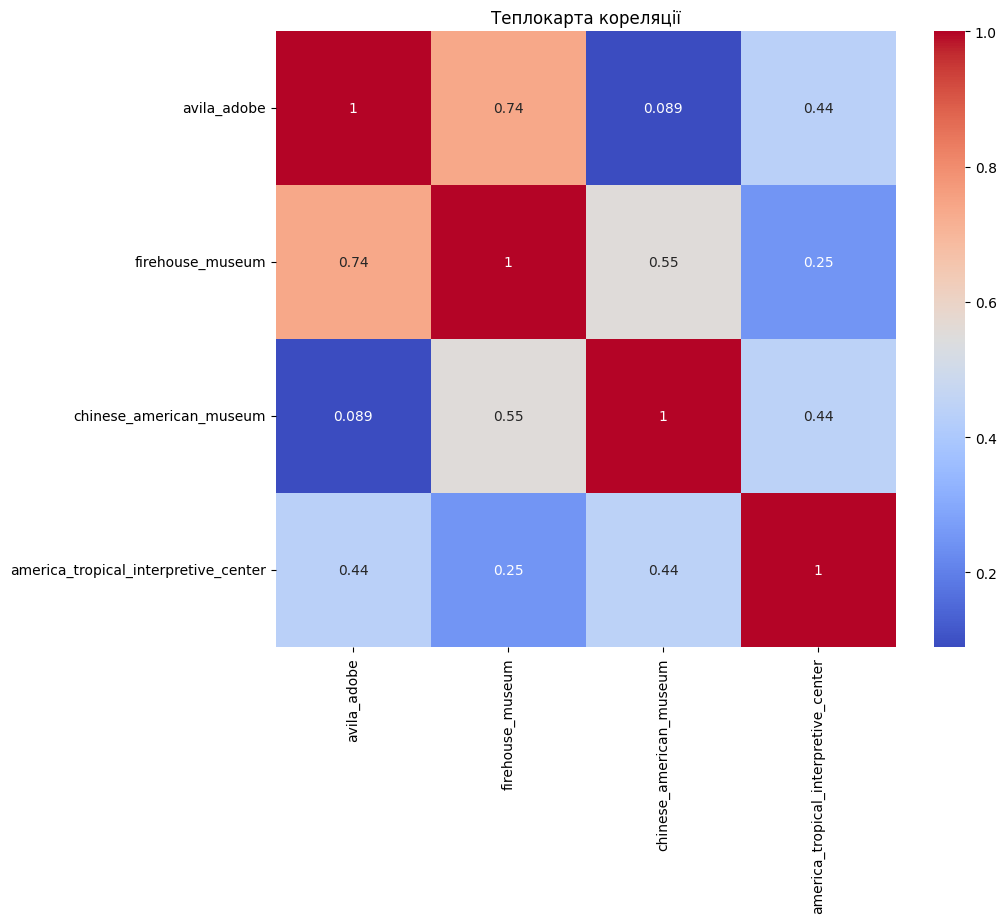

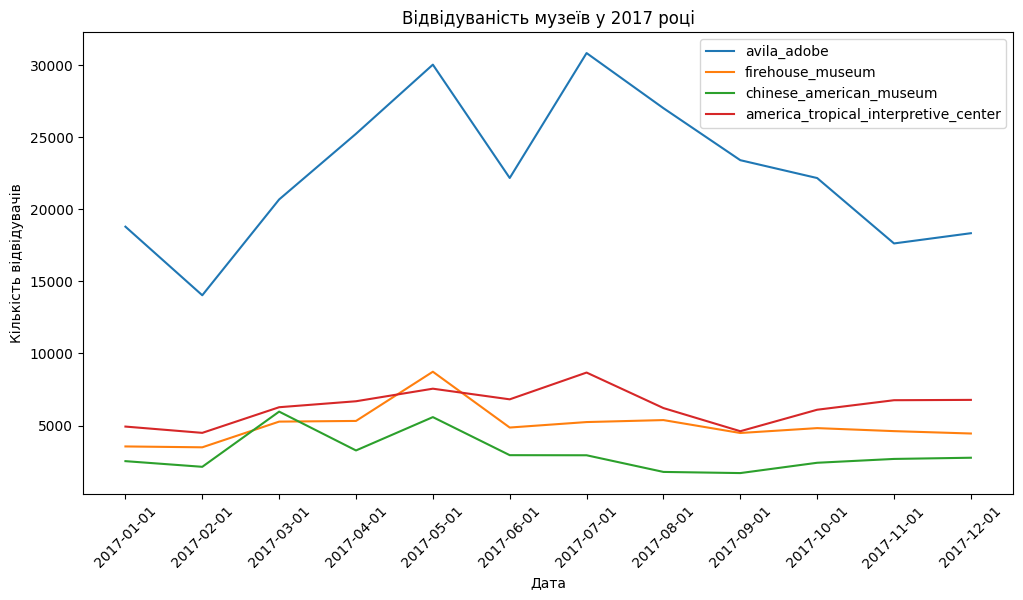

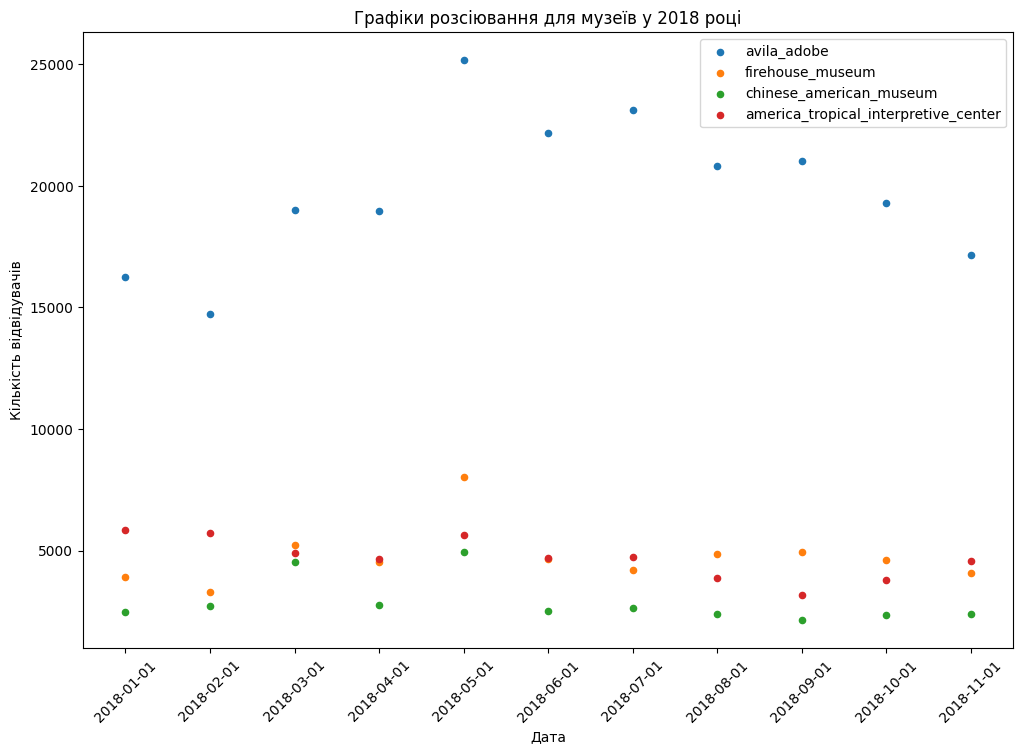

c:\Temp\ipykernel_4068\284627212.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  museums_2014_2017['year'] = pd.to_datetime(museums_2014_2017['date']).dt.year


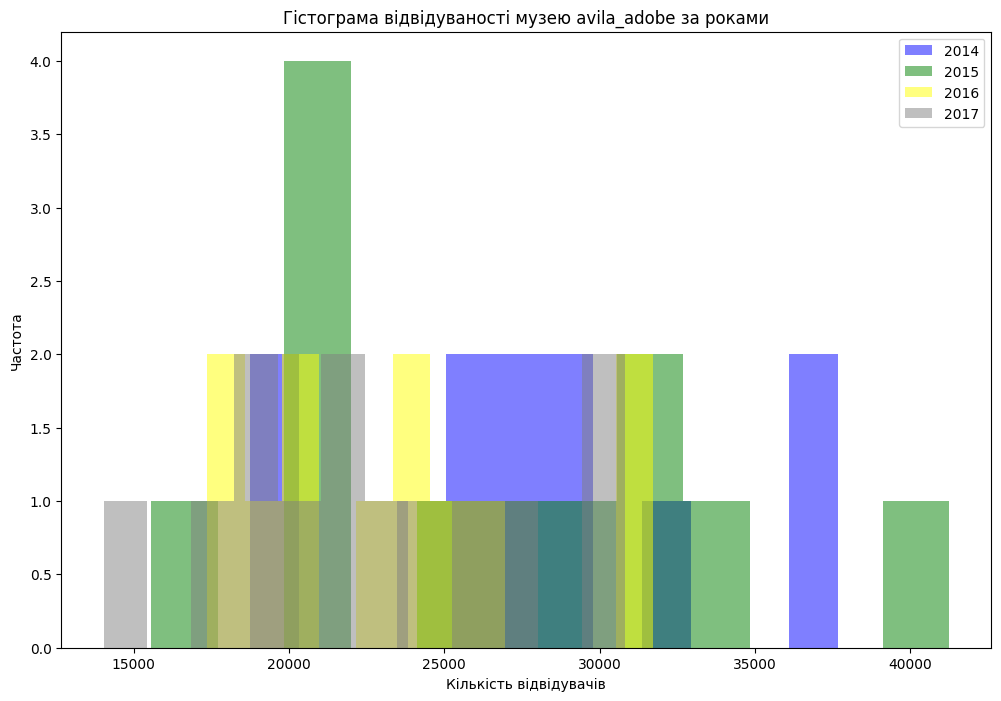

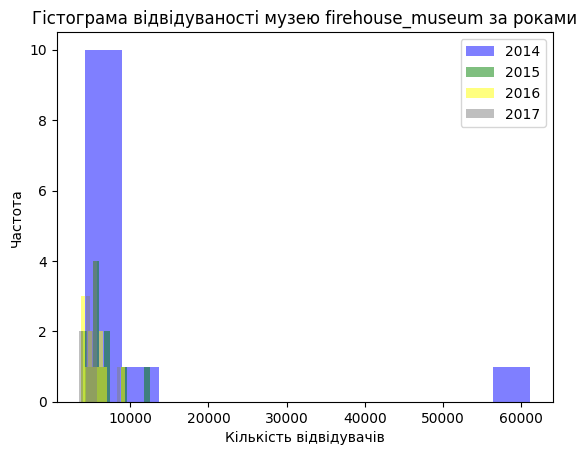

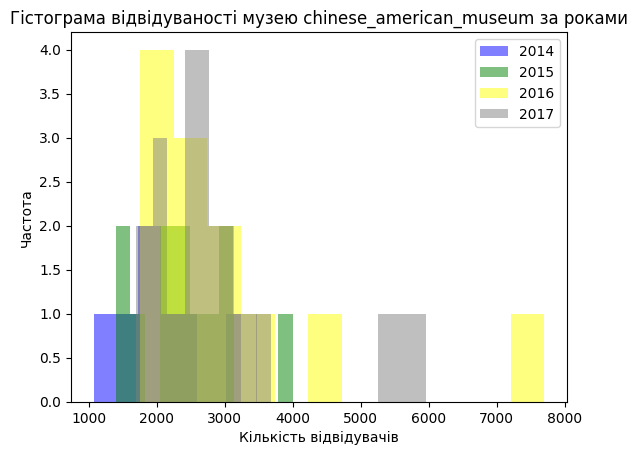

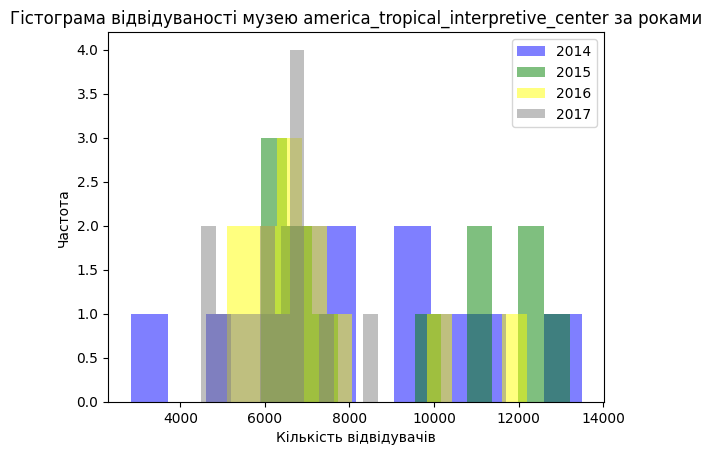

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних з CSV файлу
df = pd.read_csv('./museum_visitors.csv')

# Виведення перших 5 рядків датасету
print(df.head())

# Аналіз даних
print(f"Розмір датасету: {df.shape}")
print(f"Типи даних:\n{df.dtypes}")
print(f"Кількість пропусків:\n{df.isnull().sum()}")

# Пошук та видалення дублікатів
df = df.drop_duplicates()
print(f"Розмір таблиці після видалення дублікатів: {df.shape}")

# Визначення років, що містяться в датасеті
years = pd.to_datetime(df['Date']).dt.year.unique()
print(f"Роки в датасеті: {years}")

# Зміна назв стовбців
df.columns = ['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Обчислення середньої кількості відвідувачів для кожного музею
df['average_visitors'] = df[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].mean(axis=1)

# Знайдення мінімальної та максимальної кількості відвідувачів для кожного музею в 2018 році
museums_2018 = df[df['date'].str.startswith('2018')]
min_visitors_2018 = museums_2018.min()[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']]
max_visitors_2018 = museums_2018.max()[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']]
print(f"Мінімальна кількість відвідувачів у 2018 році:\n{min_visitors_2018}")
print(f"Максимальна кількість відвідувачів у 2018 році:\n{max_visitors_2018}")

# Знайдення місяців з найвищою та найнижчою загальною кількістю відвідувачів для 2015 року
museums_2015 = df[df['date'].str.startswith('2015')]
max_month_2015 = museums_2015[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].sum(axis=1).idxmax()
min_month_2015 = museums_2015[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].sum(axis=1).idxmin()
months = ['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень']
print(f"Місяць з найвищою загальною кількістю відвідувачів у 2015 році: {months[pd.to_datetime(df.loc[max_month_2015]['date']).month - 1]}")
print(f"Місяць з найнижчою загальною кількістю відвідувачів у 2015 році: {months[pd.to_datetime(df.loc[min_month_2015]['date']).month - 1]}")

# Порівняння кількості відвідувачів музею "Avila Adobe" у літні та зимові місяці 2018 року
avila_adobe_2018 = df[df['date'].str.startswith('2018')][['date', 'avila_adobe']]
summer_avila = avila_adobe_2018[(pd.to_datetime(avila_adobe_2018['date']).dt.month >= 6) & (pd.to_datetime(avila_adobe_2018['date']).dt.month <= 8)]
winter_avila = avila_adobe_2018[(pd.to_datetime(avila_adobe_2018['date']).dt.month >= 12) | (pd.to_datetime(avila_adobe_2018['date']).dt.month <= 2)]
print(f"Кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року: {summer_avila['avila_adobe'].sum()}")
print(f"Кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року: {winter_avila['avila_adobe'].sum()}")

# Знайдення кореляції між кількістю відвідувачів і датами у 2016 році
museums_2016 = df[df['date'].str.startswith('2016')]
correlation_matrix = museums_2016[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].corr()
print(f"Кореляція між кількістю відвідувачів і датами у 2016 році:\n{correlation_matrix}")

# Візуалізація даних

# Побудова теплокарти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Теплокарта кореляції')
plt.show()

# Побудова графіка ліній для кожного музею у 2017 році
museums_2017 = df[df['date'].str.startswith('2017')]
plt.figure(figsize=(12, 6))
for museum in ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']:
    plt.plot(museums_2017['date'], museums_2017[museum], label=museum)
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв у 2017 році')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Побудова графіків розсіювання для кожного музею за 2018 рік
museums_2018 = df[df['date'].str.startswith('2018')]
plt.figure(figsize=(12, 8))
for museum in ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']:
    plt.scatter(museums_2018['date'], museums_2018[museum], label=museum, s=20)
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Графіки розсіювання для музеїв у 2018 році')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Гістограма відвідуваності за місяцями кожного музею за 2014, 2015, 2016, 2017 роки
museums_2014_2017 = df[df['date'].str.startswith('2014') | df['date'].str.startswith('2015') | df['date'].str.startswith('2016') | df['date'].str.startswith('2017')]
museums_2014_2017['year'] = pd.to_datetime(museums_2014_2017['date']).dt.year
colors = ['blue', 'green', 'yellow', 'grey']

plt.figure(figsize=(12, 8))
for i, museum in enumerate(['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']):
    for year, color in zip([2014, 2015, 2016, 2017], colors):
        data = museums_2014_2017[museums_2014_2017['year'] == year]
        plt.hist(data[museum], bins=12, alpha=0.5, label=f'{year}', color=color)
    plt.title(f'Гістограма відвідуваності музею {museum} за роками')
    plt.xlabel('Кількість відвідувачів')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()
